In [2]:
import pandas as pd
from fbprophet import Prophet

# Généralités sur les time series

## Analyse de séries temporelles



1.  Chargement
2.  Prétraitements
3.  Modèles descriptifs
                
        Les modèles descriptifs sont des éléments considérés pour comprendre comment un système fonctionne. Ils permettent notamment de quantifier les relations entre les données.
        Rendre compte d’une masse d’informations de manière à pouvoir établir une interprétation. 

4.  Modèles prédictifs

        Les modèles prédictifs sont axés sur la prédiction d’un seul comportement 


## Définition



Données avec une indexation temporelle

(peut être générées à partir de n'importe quelles données ayant au moins un attribut chronologique)



## Séries temporelles régulières ou irrégulières



régulières → [fréquence d'échantillonnage](https://pandas.pydata.org/docs/reference/api/pandas.Series.asfreq.html)



## Autocorrélation



Relation linéaire entre le passé (immédiat) et le présent.
(~ régressionlinéaire sur une *fenêtre glissante*)



## Extrapolation vs Interpolation



-   Il est beaucoup plus difficilede prédire le futur que le passé !
    -   le découpage apprentissage / validation / test doit être chronologique
-   surtout le futur éloigné :
    -   (N pas plus loin vs 1 pas plus loin)
    
    ==> L'horizon (h)


nb : L'extrapolation est un calcul qui consiste également à estimer la valeur inconnue d'une des deux variables étudiées. Contrairement à l'interpolation, ce calcul est réalisé en dehors du domaine d'étude fourni par l'échantillon en utilisant le modèle mathématique obtenu.


## Valeurs manquantes



Compte-tenu de l'auto-corrélation et de la nécessité d'avoir des
   séries temporelles régulières pour la plupart des algorithmes, il
   est souvent pertinent de faire de l'interpolation ou du *forward
   fill* pour remplacer les valeurs manquantes.



## Les dates ne sont pas simples



-   fuseaux horaires
-   années bissextiles
-   heure d'été / d'hiver


## Attributs chronologiques



Enrichissement des données :

-   générique (e.g. jour de la semaine)
-   spécifique (e.g. vacances)



## Prévisibilité ?



# Exemple sur une série temporelle

## Exploration

#### Charger le dataset "rte.csv" 

nb : Time index etc ...

In [ ]:
# TBD

df.head()

,y
ds,
2014-11-29 23:00:00,55430
2014-11-29 23:30:00,52613
2014-11-30 00:00:00,52039
2014-11-30 00:30:00,51257
2014-11-30 01:00:00,50614


## Echantillonnage

==> Observation des profils de serie



In [ ]:
# TBD

#### Réechantillonnez par jours  et visualisez

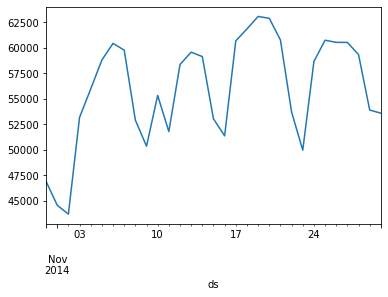

In [ ]:
 # TBD

### Passage en analyse journaliere 

Superposer le tracé de la serie selon differents echantillonage, permet de se confronter à des paradoxes

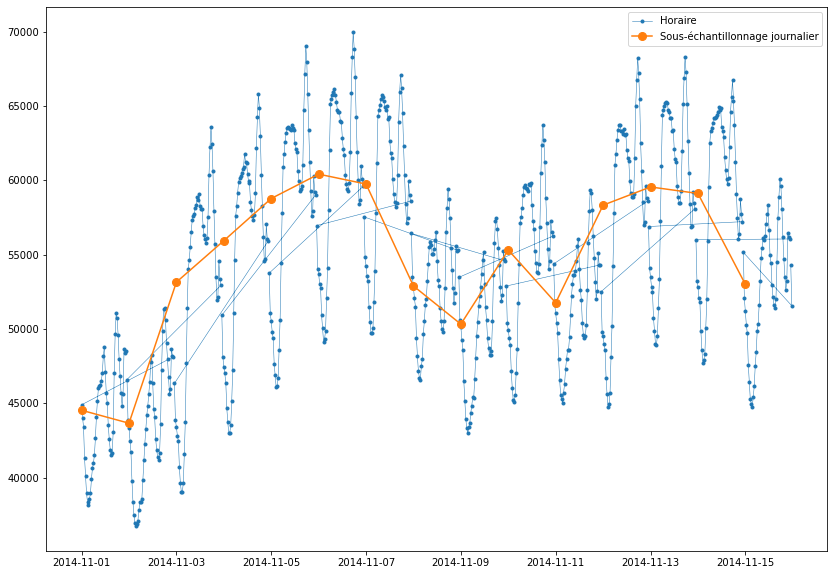

In [ ]:
import matplotlib.pyplot as plt
start, end = '2014-11-01', '2014-11-15'
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(df.loc[start:end, 'y'], marker='.', linestyle='-', linewidth=0.5, label='Horaire')
ax.plot(df.resample('D').mean().loc[start:end, 'y'], marker='o', markersize=8, linestyle='-', label='Sous-échantillonnage journalier')
ax.legend();

## Tendance

==> Une moyenne mobile calculée sur plusieurs pas de temps a tendance à detruire les periodicités et valoriser la tendance

<AxesSubplot:xlabel='ds'>

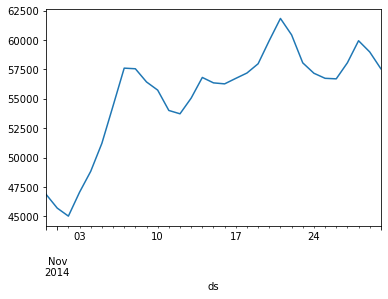

In [ ]:
jour=df['y'].resample('d').mean()

jour.rolling('5D').mean().plot()

## Composantes temporelles

#### Creer un colonne "day_of_week", "day_name", "hour"

In [ ]:
# TBD


df.head()

,y,day_of_week,day_name,hour
ds,,,,
2014-10-31 23:00:00,48288,4,Friday,23
2014-10-31 23:30:00,45467,4,Friday,23
2014-11-01 00:00:00,44904,5,Saturday,0
2014-11-01 00:30:00,44041,5,Saturday,0
2014-11-01 01:00:00,43393,5,Saturday,1


#### Realiser une viz (violon) permettant d'observer la distribution des valeurs par jours de la semaine

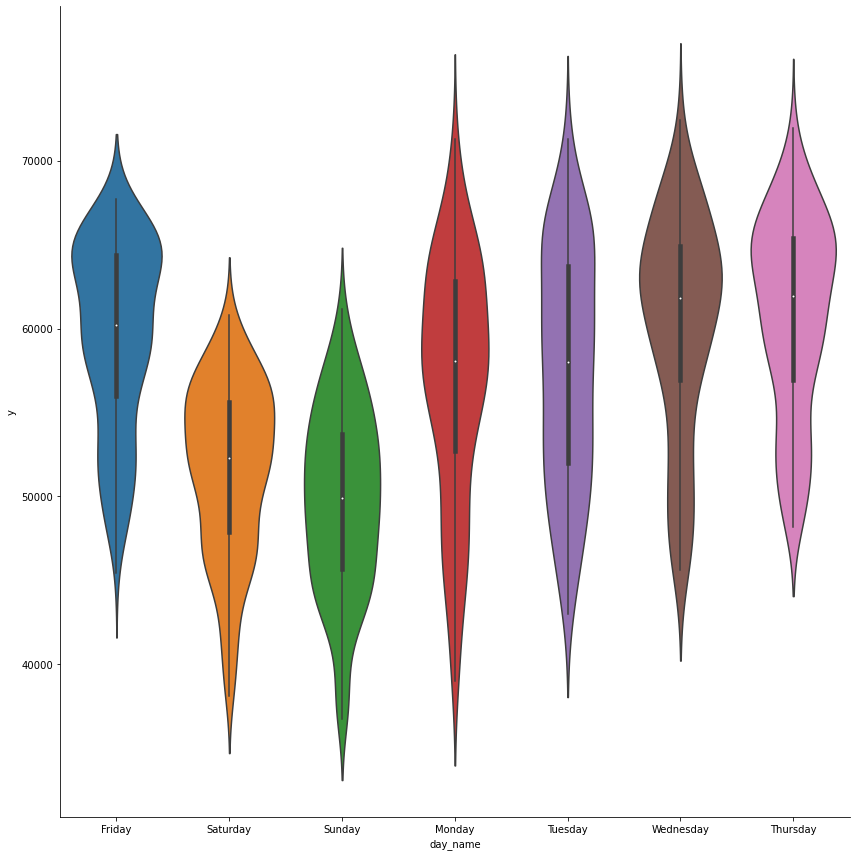

In [ ]:
import seaborn as sns

# TBD

## Prophet (facebook)
Ce qu'on voudrait, c'est pourvoir modéliser à la fois :

-   une tendance long terme, mais éventuellement avec des ruptures
-   plusieurs tendances cycliques
-   des évènements particuliers

On peut utiliser pour cela des [modèles additifs géneralisés](https://fr.wikipedia.org/wiki/Mod%C3%A8le_additif_g%C3%A9n%C3%A9ralis%C3%A9)
(Generalized Additive Model) et la [bibliothèque prophet](https://peerj.com/preprints/3190.pdf), [implémente ce type de modèle](https://medium.com/future-vision/the-math-of-prophet-46864fa9c55a).



Un modèle de décomposition consiste à appliquer des transformations pour simplifier sa série temporelle. C’est une méthode très efficace et très générale, son application est omniprésente en analyse des séries temporelles, avec différentes variations.


In [ ]:
df = pd.read_csv('Data/rte.csv')
df.head()

,ds,y
0,2014-11-29 23:00:00,55430
1,2014-11-29 23:30:00,52613
2,2014-11-30 00:00:00,52039
3,2014-11-30 00:30:00,51257
4,2014-11-30 01:00:00,50614


### Model

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

m = Prophet(yearly_seasonality="auto",
    weekly_seasonality='auto',
    daily_seasonality='auto')
m.fit(df,verbose=False)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -10.5269


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4061.91   0.000764734       502.294      0.3199      0.3199      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4078.55    0.00207034       240.846      0.8368      0.8368      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       4082.93   0.000124711       239.113   3.651e-07       0.001      310  LS failed, Hessian reset 
     299       4089.19    0.00105955       74.7563           1           1      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     363        4091.5   0.000419896       189.805   1.943e-06       0.001      518  LS failed, Hessian reset 
     399       4092.94    0.00320942       142.474       0.606           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha

### Predictions

In [ ]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
1465,2014-12-26 22:30:00
1466,2014-12-27 22:30:00
1467,2014-12-28 22:30:00
1468,2014-12-29 22:30:00
1469,2014-12-30 22:30:00


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1465,2014-12-26 22:30:00,62100.814305,23286.420098,103063.365878
1466,2014-12-27 22:30:00,55565.176411,15304.260799,98525.961647
1467,2014-12-28 22:30:00,59674.345207,16704.805475,105259.194940
1468,2014-12-29 22:30:00,64900.999349,19429.805907,112835.776936
1469,2014-12-30 22:30:00,64916.185063,16065.229618,115633.212280


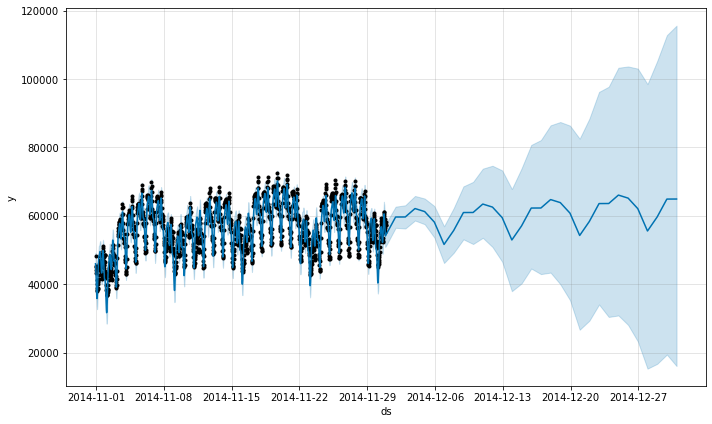

In [ ]:
_ = m.plot(forecast)

### Composantes

Evolution des composantes de tendance, cycle hebdomadaire et journalier parametrés par Prophet

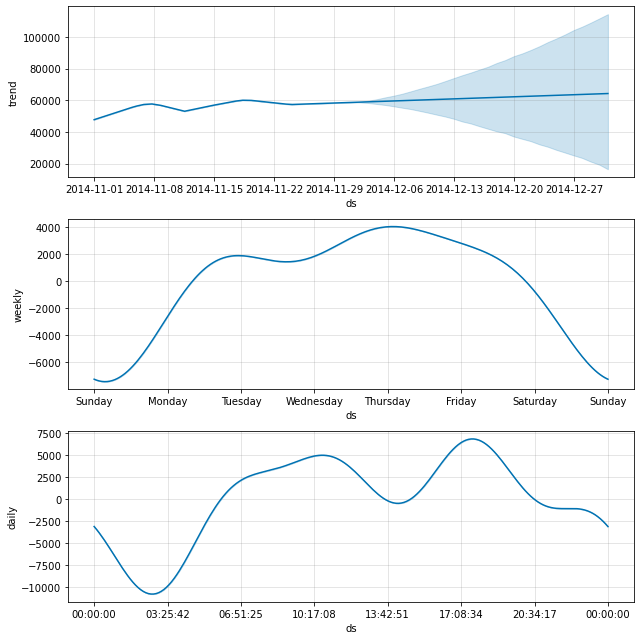

In [ ]:
_ = m.plot_components(forecast)

#### Utiliser le dataset de votre projet (Controle continue) et realiser une projection dans le futur avec prophet ?